## Step 1 - Loading libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Step 2 - Load Dataset

In [4]:
df = pd.read_csv("StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 3 - Validation & Data Cleaning

In [6]:
df.isna().sum()   # Total null values in each columns

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Hence, there are no null values in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There are three columns with numeric datatype, <<"math score", "reading score", "writing score">>

In [8]:
# Checking if there are negative values in "math score" column
df[df["math score"] < 0].shape[0]

0

In [9]:
# Checking if there are negative values in "reading score" column
df[df["reading score"] < 0].shape[0]

0

In [10]:
# Checking if there are negative values in "writing score" column
df[df["writing score"] < 0].shape[0]

0

Hence, there are no negative values in any of the column.

## Step 4 - Calculate average score

In [11]:
# Average score of subject "maths"
avg_math = df["math score"].mean()
avg_math

66.089

In [12]:
# Average score of subject "reading"
avg_read = df["reading score"].mean()
avg_read

69.169

In [13]:
# Average score of subject "writing"
avg_write = df["writing score"].mean()
avg_write

68.054

In [14]:
# Dictionary of average of each subject
averages = {"Math average" : avg_math,
           "Reading average" : avg_read,
           "Writing average" : avg_write}

print(averages)

{'Math average': 66.089, 'Reading average': 69.169, 'Writing average': 68.054}


## Step 5 - Identify top 5 students

In [15]:
# Creating a new column for total marks of each student
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]

In [16]:
# Top five highest performer students based on total marks
top_five_students = df.sort_values(by = "total score", ascending = False).head(5)
top_five_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
458,female,group E,bachelor's degree,standard,none,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300
114,female,group E,bachelor's degree,standard,completed,99,100,100,299
179,female,group D,some high school,standard,completed,97,100,100,297


## Step 6 - Visualizations

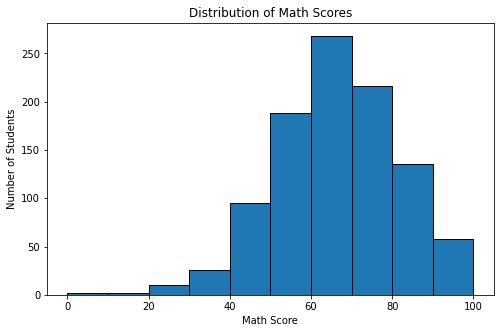

In [17]:
# Histogram representation of math scores distribution
df["math score"].plot(kind = "hist", bins = 10, figsize = (8,5), edgecolor = "black")

plt.title("Distribution of Math Scores")
plt.xlabel("Math Score")
plt.ylabel("Number of Students")
plt.show()

**Inference** :-

- Most students have scored between 60 to 70 in maths subject.
- A handful number of students have scored less than 40 in maths subject.

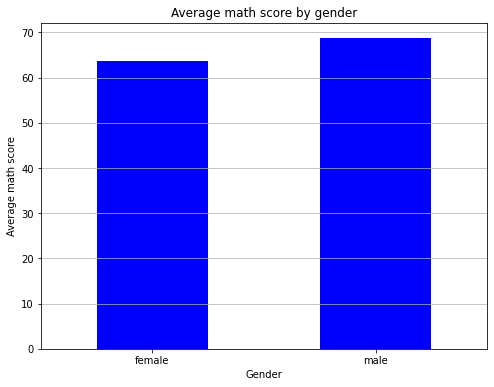

In [18]:
# Comparing average math score between both genders in a bar graph
df.groupby("gender")["math score"].mean().plot(
                       kind = 'bar', color = 'blue', figsize = (8,6)
)

plt.title('Average math score by gender')
plt.xlabel('Gender')
plt.ylabel('Average math score')
plt.grid(axis='y', alpha=0.9)
plt.xticks(rotation = 0)
plt.show()

**Inference**  :-
 - Males have performed better, on average, in the maths subject.

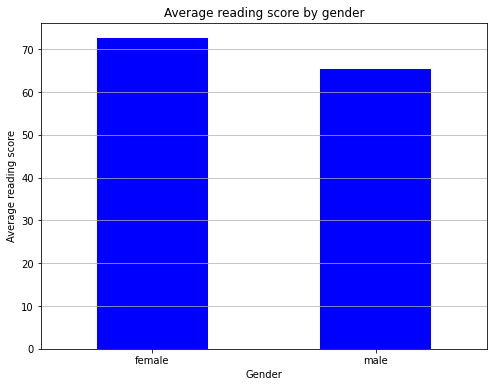

In [19]:
# Comparing average reading score between both genders in a bar graph
df.groupby("gender")["reading score"].mean().plot(
                       kind = 'bar', color = 'blue', figsize = (8,6)
)

plt.title('Average reading score by gender')
plt.xlabel('Gender')
plt.ylabel('Average reading score')
plt.grid(axis='y', alpha=0.9)
plt.xticks(rotation = 0)
plt.show()

**Inference**  :-
 - Females have performed better, on average, in the reading subject.

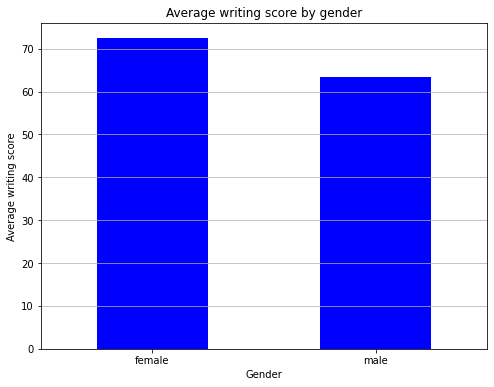

In [20]:
# Comparing average writing score between both genders in a bar graph
df.groupby("gender")["writing score"].mean().plot(
                       kind = 'bar', color = 'blue', figsize = (8,6)
)

plt.title('Average writing score by gender')
plt.xlabel('Gender')
plt.ylabel('Average writing score')
plt.grid(axis='y', alpha=0.9)
plt.xticks(rotation = 0)
plt.show()

**Inference**  :-
 - Females have performed better, on average, in the writing subject.

In [21]:
# Checking frequencies of each values of "parental level of education" feature
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [22]:
# Generating a dataframe for average scores of math, reading and writing subjects of each "parental level of education"
parent_ed_stats = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()
parent_ed_stats

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


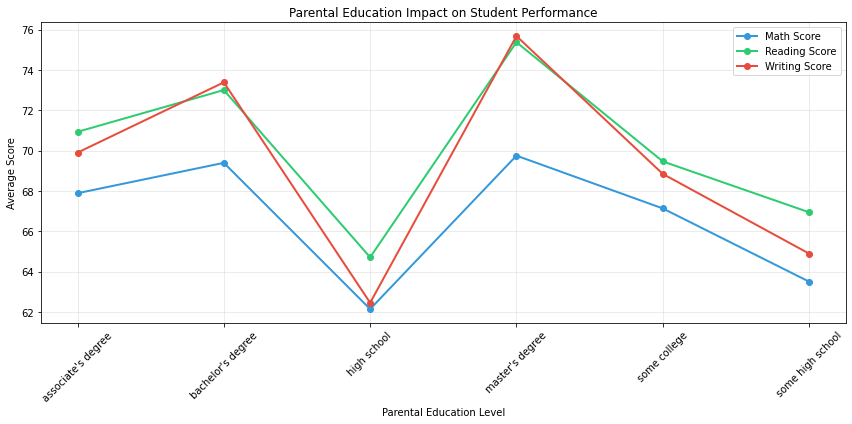

In [23]:
# Checking parental education effect on student performance
plt.figure(figsize=(12,6))

scores = ['math score', 'reading score', 'writing score']
colors = ['#3498db', '#2ecc71', '#e74c3c']

x = parent_ed_stats['parental level of education'].astype(str).to_numpy()   

for score, color in zip(scores, colors):
    plt.plot(
        x,
        parent_ed_stats[score].to_numpy(),
        marker='o',
        label=score.title(),
        color=color,
        linewidth=2
    )

plt.title('Parental Education Impact on Student Performance')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Inference** :-

- Average score of all three subjects is minimum in high school.
- Similarly, average score of all three subjects is maximum in master's degree.
- Hence, it could be concluded that there is linear positive relationship between student scores and parental education.

In [24]:
# Checking frequencies of each values of "race/ethnicity" feature
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [25]:
# Generating a dataframe for average scores of math, reading and writing subjects of each "race/ethnicity"
race_scores = df.groupby("race/ethnicity")[['math score', 'reading score', 'writing score']].mean()
race_scores

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


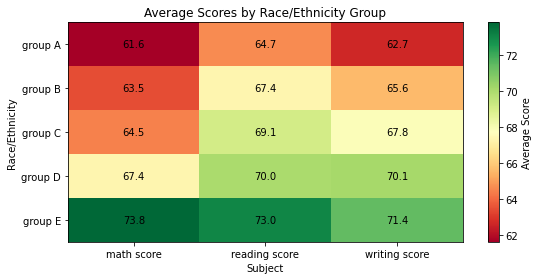

In [26]:
# Checking patterns for scores of each subject based on race/ethnicity

race_scores_numeric = race_scores.apply(pd.to_numeric, errors='coerce')   # Converting the dataframe to numeric

plt.figure(figsize=(8,4))

plt.imshow(
    race_scores_numeric.to_numpy(),
    cmap='RdYlGn',
    aspect='auto'
)

plt.xticks(
    ticks=np.arange(len(race_scores_numeric.columns)),
    labels=race_scores_numeric.columns
)
plt.yticks(
    ticks=np.arange(len(race_scores_numeric.index)),
    labels=race_scores_numeric.index
)

# Add values inside cells
for i in range(race_scores_numeric.shape[0]):
    for j in range(race_scores_numeric.shape[1]):
        plt.text(
            j, i,
            f"{race_scores_numeric.iloc[i, j]:.1f}",
            ha='center', va='center', fontsize=10
        )

plt.title('Average Scores by Race/Ethnicity Group')
plt.xlabel('Subject')
plt.ylabel('Race/Ethnicity')
plt.colorbar(label='Average Score')
plt.tight_layout()
plt.show()

**Inference** :-
 - The average score for each subject is the highest in "group E" race while the lowest in "group A" race.

## Step 7 - Complete Insights

### 1) Students with higher parental education levels consistently achieve better scores
- Students whose parents have a bachelor’s or master’s degree show higher average scores across math, reading, and writing, indicating the positive impact of educational background on academic performance.
  
### 2) Females generally perform stronger in reading and writing
- Female students outperform males in reading and writing scores, while math performance remains more balanced, highlighting subject-specific gender trends.

### 3) Male students show slightly higher variability in math scores
- Although average math scores between genders are close, males exhibit a wider spread, indicating higher performance extremes as well as lower outliers.

### 4) Race/Ethnicity Group E significantly outperforms other groups
- Students in Group E have the highest average scores across all three subjects, suggesting advantages in academic preparation or access to resources.

### 5) Group A consistently records the lowest average scores
- Compared to other race/ethnicity groups, Group A students underperform, highlighting a potential need for targeted academic support programs.

### 6) Math scores show wider variation than reading and writing scores
- The distribution of math scores is more dispersed, with greater differences between high and low performers, whereas reading and writing scores are relatively more clustered.

### 7) Test preparation courses have a strong positive impact on performance
- Students who completed the test preparation course consistently score higher—especially in math—demonstrating the effectiveness of structured academic interventions.

### 8) Reading and writing scores are strongly correlated
- Students who perform well in reading tend to also score highly in writing, suggesting overlapping skill sets and reinforcing literacy-focused learning strategies.

### 9) Students with lower parental education benefit more from test preparation
- The performance gap narrows significantly when students from lower parental education backgrounds complete test preparation courses, emphasizing the value of intervention programs.

### 10) Overall student performance is influenced by a combination of socio-economic and educational factors
- Parental education, gender, race/ethnicity, and academic support mechanisms collectively shape student outcomes, indicating that multi-dimensional strategies are required to improve performance.